In [7]:
import pandas as pd
data_path = 'uservoice_sample.csv'
df_init = pd.read_csv(data_path)
import re

In [8]:
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
from sklearn import decomposition

In [9]:
def islatin(sym):
    return sym>='a'and sym<='z'
def isdigit(sym):
    return sym>='0' and sym <='9'

In [10]:
df_init['txt'] = list(map(lambda x: str(x).lower(), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: x.replace('ё', 'е'), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: re.sub('\[[^)]*\]', '', x), list(df_init['txt'] )))
# records['txt_norm'] = list(map(lambda x: '"'+x+'"', list(records['txt_norm'] )))
df_init['txt'] = list(map(lambda x: x.encode('cp1251', errors='ignore').decode('cp1251'), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: x[1:len(x)-1], list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: "".join([w for w in x if not isdigit(w)]), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: "".join([w for w in x if not islatin(w)]), list(df_init['txt'] )))

In [11]:
df_init['txt_norm'] = list(map(lambda x: str(x).lower(), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x.replace('ё', 'е'), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: re.sub('\[[^)]*\]', '', x), list(df_init['txt_norm'] )))
# records['txt_norm'] = list(map(lambda x: '"'+x+'"', list(records['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x.encode('cp1251', errors='ignore').decode('cp1251'), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x[1:len(x)-1], list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: "".join([w for w in x if not isdigit(w)]), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: "".join([w for w in x if not islatin(w)]), list(df_init['txt_norm'] )))

In [12]:
# from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

# model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

In [13]:
# sentences = list(df_init['txt'])
# inputs = tokenizer(sentences[:10], return_tensors="pt", padding = True)

In [14]:
# inputs

In [15]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [16]:
sentences = list(df_init['txt'])
embedding_miniLM = model.encode(sentences, convert_to_tensor=True)
embedding_miniLM.shape

torch.Size([22218, 384])

In [17]:
features_matrix = []
for tensor in embedding_miniLM:
    features_matrix.append([float(elem) for elem in tensor])

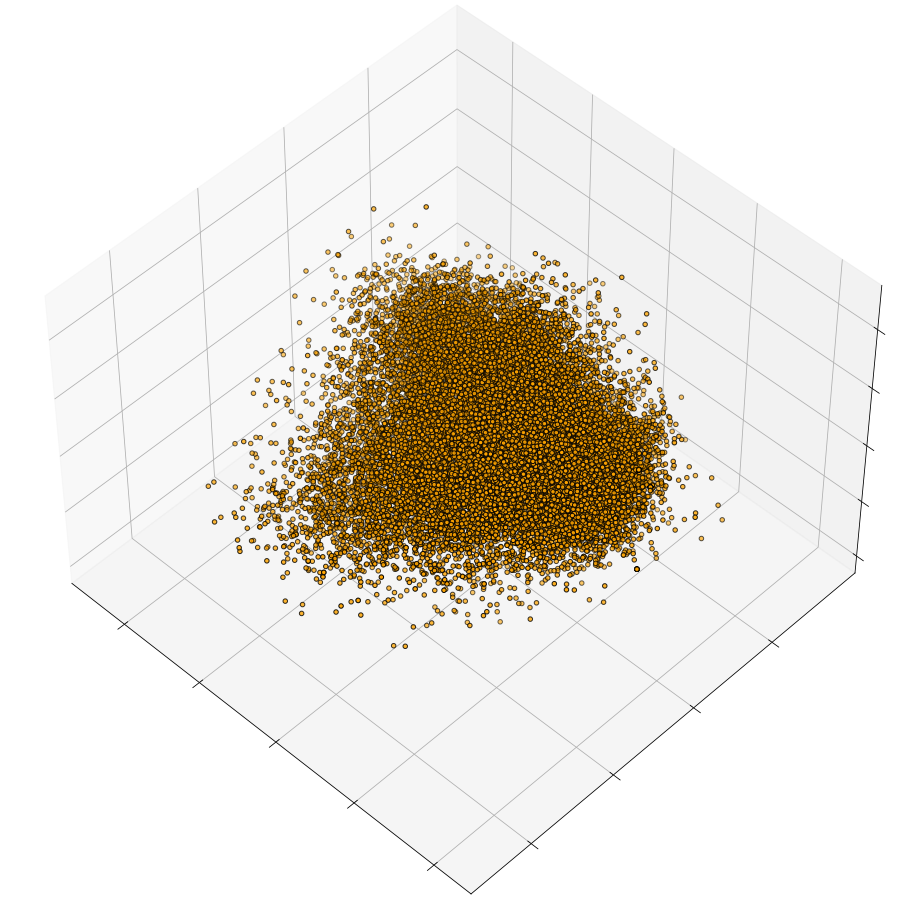

In [18]:
fig = plt.figure(1, figsize=(13, 13))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(features_matrix)
X = pca.transform(features_matrix)

# Reorder the labels to have colors matching the cluster results
#y = data['cluster_index']
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='orange', cmap='spring', edgecolor="black")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [31]:
dbscan = DBSCAN(eps=1.5)
dbscan.fit(embedding_miniLM)

DBSCAN(eps=1.5)

In [33]:
d = np.array(features_matrix)[[i == -1 for i in dbscan.labels_]]

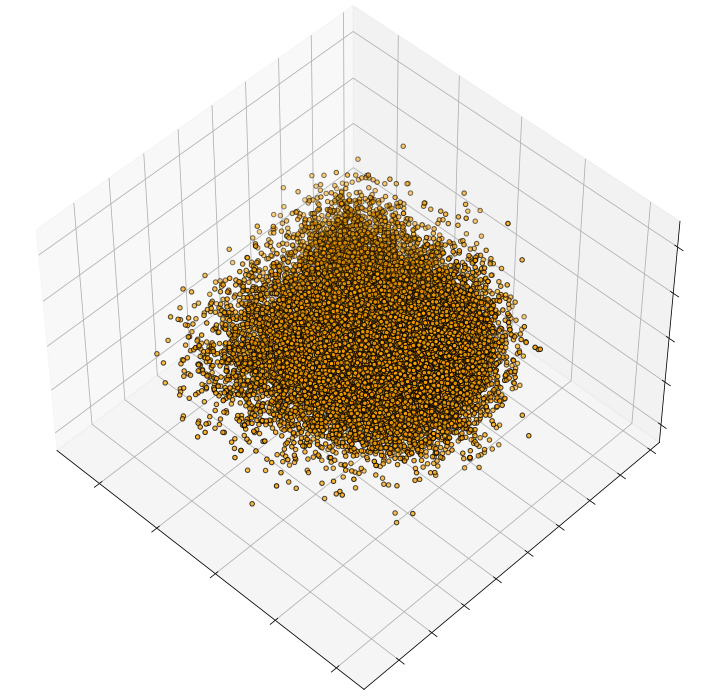

In [34]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
# pca.fit(features_matrix)
# X = pca.transform(features_matrix)

pca.fit(d)
X = pca.transform(d)

# Reorder the labels to have colors matching the cluster results
y = np.array(dbscan.labels_)[[i == -1 for i in dbscan.labels_]]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='orange',cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


In [35]:
d = np.array(features_matrix)[[i != -1 for i in dbscan.labels_]]

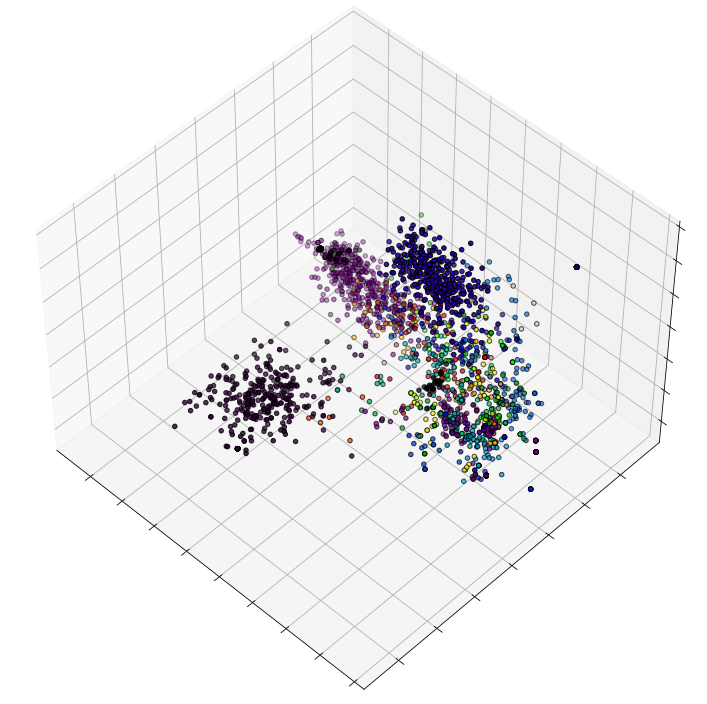

In [36]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)

# pca.fit(features_matrix)
# X = pca.transform(features_matrix)

pca.fit(d)
X = pca.transform(d)

# Reorder the labels to have colors matching the cluster results
y = np.array(dbscan.labels_)[[i != -1 for i in dbscan.labels_]]
#y = np.array(dbscan.labels_) #[[i != -1 for i in dbscan.labels_]]

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [25]:
set(df_init['txt'][[i != -1 for i in dbscan.labels_]])

{'',
 ' — :вопрос про деньги \n\n\n\n ##- пожалуйста, пишите ваш комментарий выше этой линии. обращение  -## \n \n \n \n \n \n \n \n \n \n \n \n \nобращение . пишите комментарий выше этой линии \n   \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n    \n  \n \n \n \n \n \n \n   \n \n  \n   \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n  агент поддержки  \n \n \n  .., :  \n \n \n \n \nздравствуйте. пишем вам, потому что вы обращались в службу поддержки — отображалась кнопка "указать номер карты \n \n \n \n \n \n \n \n \n \nкоманда авито \n \n оценить нашу работу \n \n \n \n \n \n \n \n \n  . \n \n \n \n< ="" ',
 'здравствуйте,  \n пользователь   обычный-  \n написал вам личное сообщение: \n \nвот номер мой  вот почта @. как заблокировали так и восстановите\n \n  ответить\n на данное сообщение  \n  отписаться от новых сообщений можно в  \nличном кабинете',
 "тема:  \nвремя: .. в : (+) \nсобытие: пришло сообщение с аудиторией  из персонального фильтра 'собственные группы'\n \n     .  \n  .  \n \

In [26]:
# df_init[[i != -1 for i in dbscan.labels_]]

In [27]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

In [28]:
# tokenizer('Hello')

In [29]:
dp_embedding = []
for sent in list(df_init['txt'][:10000]):
    inputs = tokenizer(sent, return_tensors="pt", max_)
    outputs = model(**inputs)
    emb = outputs.last_hidden_state
    print(emb.shape)
    dp_embedding.append(emb)

SyntaxError: positional argument follows keyword argument (<ipython-input-29-e6d1691c946a>, line 3)

In [ ]:
outputs.last_hidden_state